# COVID-19 Project

In this project I will analyze two data sets regarding COVID-19 and get insights from them.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
#To alert when the code is done running
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz

In [35]:
#SQL magic
#!pip install ipython-sql
import sqlalchemy
engine = sqlalchemy.create_engine('sqlite:///sqlite3.db', echo=True) #
%reload_ext sql
%sql sqlite:///sqlite3.db

## Constructing the Dataset

The first data set is composed of countries and the accumulative spread of COVID-19 per day.

In [36]:
path1 = './covid19_Confirmed_dataset.csv'
df1 = pd.read_csv(path1)
df1.to_sql('COVID_CONF', con=engine, if_exists='append')
print('Conversion successful!')

2020-10-06 10:35:49,940 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-10-06 10:35:49,940 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:49,948 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-10-06 10:35:49,948 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:49,956 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("COVID_CONF")
2020-10-06 10:35:49,956 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:49,972 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-10-06 10:35:50,084 INFO sqlalchemy.engine.base.Engine INSERT INTO "COVID_CONF" ("index", "Province/State", "Country/Region", "Lat", "Long", "1/22/20", "1/23/20", "1/24/20", "1/25/20", "1/26/20", "1/27/20", "1/28/20", "1/29/20", "1/30/20", "1/31/20", "2/1/20", "2/2/20", "2/3/20", "2/4/20", "2/5/20", "2/6/20", "2/7/20", "2/8/20", "2/9/20", "2/10/20", "2/11/20", "2/12/20", "2/13/20", "2/14/20", "2/1

In [37]:
%%sql

SELECT * FROM COVID_CONF
LIMIT 3

 * sqlite:///sqlite3.db
Done.


index,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,None,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


The second data set consists on countries' different scores of life conditions.

In [38]:
path2 = './worldwide_happiness_report.csv'
df2 = pd.read_csv(path2)
df2.to_sql('HAPPINESS', con=engine, if_exists='replace')
print('Conversion successful!')

2020-10-06 10:35:50,220 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("HAPPINESS")
2020-10-06 10:35:50,220 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:50,228 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-10-06 10:35:50,236 INFO sqlalchemy.engine.base.Engine INSERT INTO "HAPPINESS" ("index", "Overall rank", "Country or region", "Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
2020-10-06 10:35:50,244 INFO sqlalchemy.engine.base.Engine ((0, 1, 'Finland', 7.769, 1.34, 1.587, 0.986, 0.596, 0.153, 0.39299999999999996), (1, 2, 'Denmark', 7.6, 1.383, 1.5730000000000002, 0.996, 0.5920000000000001, 0.252, 0.41), (2, 3, 'Norway', 7.553999999999999, 1.4880000000000002, 1.5819999999999999, 1.028, 0.603, 0.271, 0.341), (3, 4, 'Iceland', 7.494, 1.38, 1.624, 1.026, 0.591, 0.354, 0.11800000000000001), (4, 5, 'Netherlands', 7.4879999999

In [39]:
print('The shape of df1 is: ', df1.shape)
print('The shape of df2 is: ', df2.shape)

The shape of df1 is:  (266, 104)
The shape of df2 is:  (156, 9)


In [40]:
%%sql

SELECT * FROM HAPPINESS
LIMIT 3

 * sqlite:///sqlite3.db
Done.


index,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.39299999999999996
1,2,Denmark,7.6,1.383,1.5730000000000002,0.996,0.5920000000000001,0.252,0.41
2,3,Norway,7.553999999999999,1.4880000000000002,1.5819999999999999,1.028,0.603,0.271,0.341


Let's now join both data sets through the country and convert the result to a new data set. 

*Note:* not all countries from the 1st data set appear in the 2nd data set, hence the inner join.

In [41]:
join = %sql SELECT * FROM COVID_CONF INNER JOIN HAPPINESS ON COVID_CONF.'Country/Region'=HAPPINESS.'Country or region'
df_joined = join.DataFrame()

 * sqlite:///sqlite3.db
Done.


In [42]:
df_joined.head()

,index,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,index,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,None,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,0,None,Afghanistan,33.0000,65.0000,0,0,0,0,0,...,153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
2,1,None,Albania,41.1533,20.1683,0,0,0,0,0,...,106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,1,None,Albania,41.1533,20.1683,0,0,0,0,0,...,106,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
4,2,None,Algeria,28.0339,1.6596,0,0,0,0,0,...,87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114


We can delete de index columns of these data set, the duplicate country column, and overall rank.

In [43]:
df_joined.drop(columns=['index','Overall rank', 'Country or region'],axis=1,inplace=True)
df_joined.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,None,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,None,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.350,0.517,0.361,0.000,0.158,0.025
2,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,4.719,0.947,0.848,0.874,0.383,0.178,0.027
4,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3649,3848,4006,5.211,1.002,1.160,0.785,0.086,0.073,0.114


In [44]:
df_joined.shape

(1332, 111)

To avoid repetition, let's sort the data by country.

In [45]:
df_joined.sort_values('Country/Region',inplace=True)
df_joined.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.35,0.517,0.361,0.0,0.158,0.025
889,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.35,0.517,0.361,0.0,0.158,0.025
445,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.35,0.517,0.361,0.0,0.158,0.025
444,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.35,0.517,0.361,0.0,0.158,0.025
888,None,Afghanistan,33.0,65.0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.35,0.517,0.361,0.0,0.158,0.025


It is obvious that data is duplicated.

In [46]:
df_joined.drop_duplicates(inplace=True)
df_joined.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,None,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.350,0.517,0.361,0.000,0.158,0.025
891,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,4.719,0.947,0.848,0.874,0.383,0.178,0.027
5,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3649,3848,4006,5.211,1.002,1.160,0.785,0.086,0.073,0.114
450,None,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,4127,4285,4428,6.086,1.092,1.432,0.881,0.471,0.066,0.050
896,None,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1867,1932,2066,4.559,0.850,1.055,0.815,0.283,0.095,0.064


Now let's reset the indexes and look at the shape.

In [47]:
df_joined.reset_index(drop=True,inplace=True)
df_joined.shape

(222, 111)

It is evident that all data was duplicated. Now, let's mix the values of Province/State with Country/Region for those cases that have both values.

In [48]:
for i in range(len(df_joined)):
    
    if df_joined["Province/State"].notnull()[i]:
        
        df_joined.loc[i,"Country/Region"]= df_joined.loc[i,"Province/State"] +' ('+df_joined.loc[i,"Country/Region"] + ')'
        df_joined.loc[i,"Province/State"]= None

print('The number of non-null values in Province is:', df_joined['Province/State'].notnull().sum())
winsound.Beep(freq, duration)

The number of non-null values in Province is: 0


It's time to drop the 'Province/State' column.

In [49]:
df_joined.drop('Province/State', axis=1,inplace=True)
df_joined.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/28/20,4/29/20,4/30/20,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1828,1939,2171,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,750,766,773,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,3649,3848,4006,5.211,1.002,1.160,0.785,0.086,0.073,0.114
3,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,...,4127,4285,4428,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,...,1867,1932,2066,4.559,0.850,1.055,0.815,0.283,0.095,0.064


Also, to avoid confusion, let's change the name of the 'Score' column to 'Happiness Score' to avoid confusion. Then let's sort the values alphabetically.

In [50]:
df_joined.rename(columns={'Score':'Happiness Score'},inplace=True)
df_joined.sort_values('Country/Region',inplace=True)
df_joined.reset_index(drop=True,inplace=True)

In [51]:
df_joined.shape

(222, 110)

Using the data from the UN (https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx), I constructed a new data set that includes countries and its population of 2019 (before the impact of the pandemic). For specific territories or missing countries from this data, other sources were used. All this is found in the pop_data.csv file.

In [52]:
path3 = './pop_data.csv'
df3 = pd.read_csv(path3)
df3.to_sql('POPULATION', con=engine, if_exists='replace')

2020-10-06 10:35:52,569 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("POPULATION")
2020-10-06 10:35:52,577 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,577 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("POPULATION")
2020-10-06 10:35:52,577 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,585 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-10-06 10:35:52,585 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,593 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("POPULATION")
2020-10-06 10:35:52,593 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,593 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2020-10-06 10:35:52,593 INFO sqlalchemy.engine.base.Engine ('POPULATION',)
2020-10-06 10:35:52,601 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_k

In [53]:
%%sql

SELECT * FROM POPULATION
LIMIT 3

 * sqlite:///sqlite3.db
Done.


index,Country,Population 2019,Source
0,Afghanistan,38041757,UN
1,Albania,2880913,UN
2,Alberta (Canada),4384968,statcan.gc.ca


Now, let's convert df_joined to sql.

In [54]:
df_joined.to_sql('COVID_HAPPINESS', con=engine, if_exists='replace')

2020-10-06 10:35:52,759 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("COVID_HAPPINESS")
2020-10-06 10:35:52,759 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,767 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("COVID_HAPPINESS")
2020-10-06 10:35:52,767 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,775 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-10-06 10:35:52,775 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,775 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("COVID_HAPPINESS")
2020-10-06 10:35:52,783 INFO sqlalchemy.engine.base.Engine ()
2020-10-06 10:35:52,816 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2020-10-06 10:35:52,816 INFO sqlalchemy.engine.base.Engine ('COVID_HAPPINESS',)
2020-10-06 10:35:52,816 INFO sqlalchemy.engine.base.Engine P

2020-10-06 10:35:53,017 INFO sqlalchemy.engine.base.Engine COMMIT
2020-10-06 10:35:53,030 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-10-06 10:35:53,030 INFO sqlalchemy.engine.base.Engine ()


In [55]:
join = %sql SELECT * FROM COVID_HAPPINESS INNER JOIN POPULATION ON COVID_HAPPINESS.'Country/Region'=POPULATION.'Country'
df_w_pop = join.DataFrame()

 * sqlite:///sqlite3.db
Done.


In [56]:
df_w_pop.drop(['index','Country','Source'], axis=1, inplace=True)
df_w_pop.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/29/20,4/30/20,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population 2019
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1939,2171,3.203,0.350,0.517,0.361,0.000,0.158,0.025,38041757
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,766,773,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2880913
2,Alberta (Canada),53.9333,-116.5765,0,0,0,0,0,0,0,...,5165,5355,7.278,1.365,1.505,1.039,0.584,0.285,0.308,4384968
3,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,3848,4006,5.211,1.002,1.160,0.785,0.086,0.073,0.114,43053054
4,Anguilla (United Kingdom),18.2206,-63.0686,0,0,0,0,0,0,0,...,3,3,7.054,1.333,1.538,0.996,0.450,0.348,0.278,14869


In [133]:
df_w_pop.shape

(219, 110)

In [57]:
df_w_pop[df_w_pop['Population 2019'].isnull()]

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/29/20,4/30/20,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population 2019
47,Diamond Princess (Canada),0.0000,0.0000,0,0,0,0,0,0,0,...,0,0,7.278,1.365,1.505,1.039,0.584,0.285,0.308,None
68,Grand Princess (Canada),37.6489,-122.6655,0,0,0,0,0,0,0,...,13,13,7.278,1.365,1.505,1.039,0.584,0.285,0.308,None
164,Recovered (Canada),0.0000,0.0000,0,0,0,0,0,0,0,...,0,0,7.278,1.365,1.505,1.039,0.584,0.285,0.308,None


As we can see, there is some additional data that can't be considered as a country or region. Therefore, this data will be dropped.

In [58]:
df_w_pop.dropna(subset=['Population 2019'],axis=0, inplace=True)
print('Number of rows deleted: ', df_joined.shape[0]-df_w_pop.shape[0])

Number of rows deleted:  3


In [59]:
df_w_pop.set_index('Country/Region',inplace=True)

To have more generalized results per country, it is relevant to analyze the positive cases for the first month intstead of having individual cases. For this it is necessary to generate an algorithm that will count the number this value for every country.

In [74]:
dates = df_w_pop.iloc[:,2:102].columns.tolist()

In [75]:
df_time=df_w_pop[dates]
df_time.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Alberta (Canada),0,0,0,0,0,0,0,0,0,0,...,3095,3401,3720,4017,4233,4480,4696,4850,5165,5355
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Anguilla (United Kingdom),0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


This data frame can later be used for visualization so let's create a new one exclusively for counting.

In [91]:
df_month1=df_time.copy()
n_rows=df_month1.shape[0]
n_cols=df_month1.shape[1]
total_sums=[]
day1=[]

for row in range(n_rows):
    cases=0
    n_days=0
    
    for col in range(n_cols):
        
            if ((df_month1.iloc[row,col]!=0 or cases!=0) and n_days<=30):
                cases=df_month1.iloc[row,col]
                n_days=n_days+1
                if(n_days==1):
                    day1.append(df_month1.columns[col])
    
    total_sums.append(cases)
    
df_month1.insert(loc=0,column='1st Month Total', value=total_sums)
df_month1.insert(loc=1,column='Day 1', value=day1)
df_month1.drop(dates,axis=1,inplace=True)
df_month1.head()

,1st Month Total,Day 1
Country/Region,,
Afghanistan,84,2/24/20
Albania,400,3/9/20
Alberta (Canada),1181,3/6/20
Algeria,367,2/25/20
Anguilla (United Kingdom),3,3/28/20


Let's transform Day 1 into an actual datetime type.

In [92]:
df_month1[['Day 1']]='0'+df_month1[['Day 1']]+'20'
for i in range(len(df_month1)):
    if (len(df_month1.iloc[i,1])!=10):
        part1=df_month1.iloc[i,1][:3]
        part2=df_month1.iloc[i,1][3:]
        df_month1.iloc[i,1]=part1+'0'+part2

#To erase the / sign
    
df_month1['Day 1']=pd.to_datetime(df_month1['Day 1'], format='%m/%d/%Y')
df_month1.head()

,1st Month Total,Day 1
Country/Region,,
Afghanistan,84,2020-02-24
Albania,400,2020-03-09
Alberta (Canada),1181,2020-03-06
Algeria,367,2020-02-25
Anguilla (United Kingdom),3,2020-03-28


For countries that started getting cases in April, there is not enough information to analyze the 1st month. Therefore, lets assign it's total as NA, and later, I'll erase those corresponding columns.

In [93]:
df_month1.loc[df_month1['Day 1']>'2020-03-31','1st Month Total']= None
df_month1[df_month1['Day 1']>'2020-03-31']

,1st Month Total,Day 1
Country/Region,,
"Bonaire, Sint Eustatius and Saba (Netherlands)",NaN,2020-04-02
Comoros,NaN,2020-04-30
Falkland Islands (Malvinas) (United Kingdom),NaN,2020-04-04
Malawi,NaN,2020-04-02
Saint Pierre and Miquelon (France),NaN,2020-04-05
South Sudan,NaN,2020-04-05
Tajikistan,NaN,2020-04-30
Yemen,NaN,2020-04-10


In [94]:
def COVID (country):

    df_time.transpose()[country].plot(kind='line')
    plt.ylabel('Accumulated Cases')
    plt.xlabel('Dates')
    plt.title('COVID Accumulated Cases of ' + country)
    plt.show()

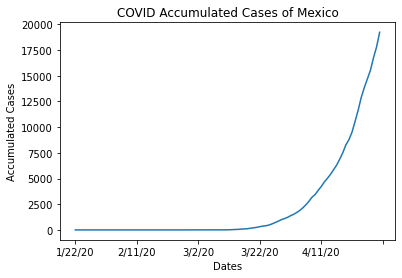

In [95]:
COVID('Mexico')

## Final Forms of the Data Set

In [96]:
df_EA= pd.concat([df_w_pop,df_month1], axis=1)

Now let's delete those rows that have missing totals of the 1st month.

In [97]:
df_EA.dropna(subset=['1st Month Total'], axis=0, inplace=True)

In [98]:
df_EA.drop(dates+['Lat', 'Long','Day 1', 'Generosity','Perceptions of corruption'], axis=1, inplace=True)

Next, it is necessary to consider the first month's positive cases per 100K people.

In [99]:
df_EA['Population 2019'].loc['Kosovo']

'1,809,280\xa0'

In [100]:
df_EA.loc['Kosovo','Population 2019']='1809280'

In [101]:
df_EA['Population 2019']=df_EA['Population 2019'].astype('int64')

In [102]:
#df_EA.drop('Postive Case per 100K',axis=1,inplace=True)
df_EA['Positive Cases per 1M in 1st Month of Infection']=(df_EA['1st Month Total']/df_EA['Population 2019'])*1000000
df_EA.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Population 2019,1st Month Total,Positive Cases per 1M in 1st Month of Infection
Country/Region,,,,,,,,
Afghanistan,3.203,0.350,0.517,0.361,0.000,38041757,84.0,2.208100
Albania,4.719,0.947,0.848,0.874,0.383,2880913,400.0,138.844873
Alberta (Canada),7.278,1.365,1.505,1.039,0.584,4384968,1181.0,269.329217
Algeria,5.211,1.002,1.160,0.785,0.086,43053054,367.0,8.524366
Anguilla (United Kingdom),7.054,1.333,1.538,0.996,0.450,14869,3.0,201.762055


Let's delete the Population 2019, 1st Month Total columns.

In [103]:
df_cleaned=df_EA.drop(['1st Month Total','Population 2019'], axis=1)
df_cleaned.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Positive Cases per 1M in 1st Month of Infection
Country/Region,,,,,,
Afghanistan,3.203,0.350,0.517,0.361,0.000,2.208100
Albania,4.719,0.947,0.848,0.874,0.383,138.844873
Alberta (Canada),7.278,1.365,1.505,1.039,0.584,269.329217
Algeria,5.211,1.002,1.160,0.785,0.086,8.524366
Anguilla (United Kingdom),7.054,1.333,1.538,0.996,0.450,201.762055


In [167]:
df_cleaned.shape

(211, 6)

## Data Visualization and Statistical Analysis

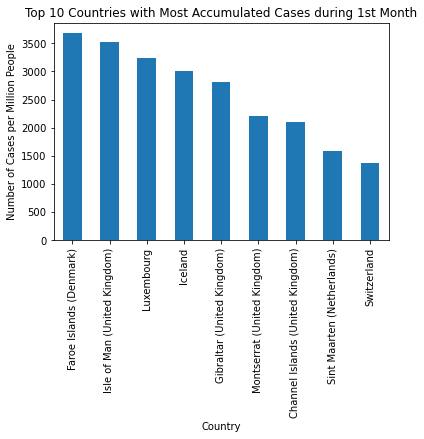

In [168]:
df_cleaned['Positive Cases per 1M in 1st Month of Infection'].sort_values(ascending=False)[0:9].plot(kind='bar')
plt.ylabel('Number of Cases per Million People')
plt.xlabel('Country')
plt.title('Top 10 Countries with Most Accumulated Cases during 1st Month')
plt.show()

In [142]:
df_cleaned.corr().iloc[:-1,-1].to_frame()

,Positive Cases per 1M in 1st Month of Infection
Happiness Score,0.407960
GDP per capita,0.345297
Social support,0.332634
Healthy life expectancy,0.304640
Freedom to make life choices,0.158251


## Feature Scaling and Train-Test-Split

In [106]:
df_cleaned.to_csv('.\complete_dataset.csv',header=True,index=True)

In [114]:
df_cleaned = pd.read_csv('.\complete_dataset.csv',index_col=0)

In [228]:
X_unscaled= df_cleaned.drop('Positive Cases per 1M in 1st Month of Infection', axis=1)
y=df_cleaned['Positive Cases per 1M in 1st Month of Infection']

In [229]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X_unscaled)

In [230]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size=0.15, random_state=11)

In [231]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (179, 5)
X_test shape:  (32, 5)
y_train shape:  (179,)
y_test shape:  (32,)


## Model

In [232]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [233]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [1079.44616207  329.67463792 -189.41878338 -223.06838298 -221.05998927]
Intercept:  -127.900372217468


In [234]:
Weights_df=pd.DataFrame()
Weights_df.insert(0,'Features',X_unscaled.columns.values)
Weights_df.insert(1,'Weights',regr.coef_)
Weights_df=Weights_df.append(pd.DataFrame([['Bias', regr.intercept_]], columns=list(Weights_df.columns.values)))
Weights_df.set_index('Features',inplace=True)
Weights_df

,Weights
Features,
Happiness Score,1079.446162
GDP per capita,329.674638
Social support,-189.418783
Healthy life expectancy,-223.068383
Freedom to make life choices,-221.059989
Bias,-127.900372


In [235]:
var1=[]
for i in range(Weights_df.shape[0]-1):
    var1.append('X%d'%(i+1))
var1.append('1')
print(var1)

['X1', 'X2', 'X3', 'X4', 'X5', '1']


In [236]:
Weights_df.insert(0,'Variable',var1)
Weights_df

,Variable,Weights
Features,,
Happiness Score,X1,1079.446162
GDP per capita,X2,329.674638
Social support,X3,-189.418783
Healthy life expectancy,X4,-223.068383
Freedom to make life choices,X5,-221.059989
Bias,1,-127.900372


## Evaluation

In [237]:
y_pred = regr.predict(X_test)

In [238]:
rep_cols=['Model','MAE','MSE','R^2']
report=pd.DataFrame(columns=rep_cols)
mdl=['NPC', 'MIC']
report['Model']=mdl

In [239]:
#MAE
report.loc[0,'MAE']=round(np.mean(np.absolute(y_pred - y_test)),2)
#MSE
report.loc[0,'MSE']=round(np.mean((y_pred - y_test)** 2),2)
#R2
report.loc[0,'R^2']=round(r2_score(y_pred , y_test),2)

In [240]:
report

,Model,MAE,MSE,R^2
0,NPC,248.72,237506,-3.16
1,MIC,NaN,NaN,NaN


In [13]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" %np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred - y_test)** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 248.72
Residual sum of squares (MSE): 237506.25
R2-score: -3.16


## 2nd Look at Visuals

In [19]:
import seaborn as sns

def scatters(feature):
    
    sns.regplot(x=feature, y='Positive Cases per 1M in 1st Month of Infection', data=df_cleaned)
    plt.ylim(0,)

In [15]:
df_cleaned.columns

Index(['Happiness Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Positive Cases per 1M in 1st Month of Infection'],
      dtype='object')

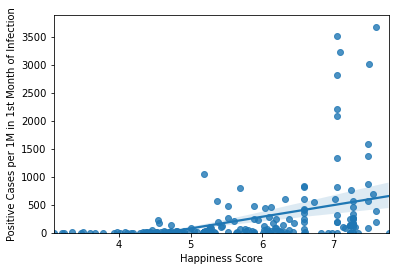

In [20]:
scatters('Happiness Score')

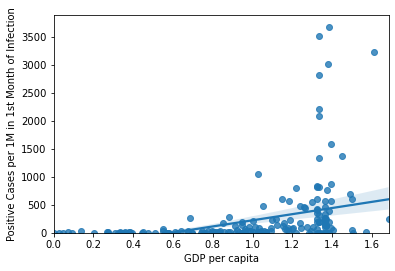

In [21]:
scatters('GDP per capita')

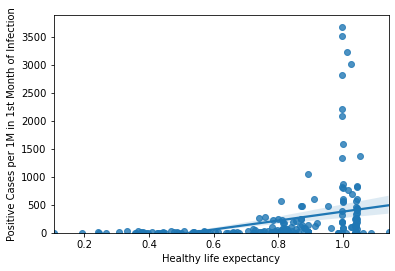

In [22]:
scatters('Healthy life expectancy')

From these images, it is obvious that the relationship between these variables isn't linear.

## Model 2: Polynomial Degree 2

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

yhat=pipe.predict(X_test)

In [29]:
print("Mean absolute error: %.2f" %np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" %np.mean((yhat - y_test)** 2))
print("R2-score: %.2f" % r2_score(yhat , y_test) )

Mean absolute error: 263.77
Residual sum of squares (MSE): 235512.19
R2-score: -0.81


## Model 3: Polynomial Degree 3

In [30]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3)),('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X_train,y_train)

yhat=pipe.predict(X_test)

In [31]:
print("Mean absolute error: %.2f" %np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" %np.mean((yhat - y_test)** 2))
print("R2-score: %.2f" % r2_score(yhat , y_test) )

Mean absolute error: 523.25
Residual sum of squares (MSE): 663131.65
R2-score: 0.00


## Obtaining Max Rate of Change

In [79]:
df_time.loc['Afghanistan'].diff().max()

232.0

In [111]:
df_cleaned.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Positive Cases per 1M in 1st Month of Infection
Country/Region,,,,,,
Afghanistan,3.203,0.350,0.517,0.361,0.000,2.208100
Albania,4.719,0.947,0.848,0.874,0.383,138.844873
Alberta (Canada),7.278,1.365,1.505,1.039,0.584,269.329217
Algeria,5.211,1.002,1.160,0.785,0.086,8.524366
Anguilla (United Kingdom),7.054,1.333,1.538,0.996,0.450,201.762055


In [116]:
max_roc=[]
df_max_roc=df_cleaned.drop('Positive Cases per 1M in 1st Month of Infection', axis=1)

for c in list(df_cleaned.index):
    max_roc.append(df_time.loc[c].diff().max())
    
df_max_roc.insert(5,'Max Change',max_roc)

In [145]:
df_max_roc['Population 2019']=df_EA['Population 2019']

In [149]:
df_max_roc=df_max_roc[['Happiness Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Population 2019',
       'Max Change']]

In [150]:
df_max_roc.head()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Population 2019,Max Change
Country/Region,,,,,,,
Afghanistan,3.203,0.350,0.517,0.361,0.000,38041757,232.0
Albania,4.719,0.947,0.848,0.874,0.383,2880913,34.0
Alberta (Canada),7.278,1.365,1.505,1.039,0.584,4384968,401.0
Algeria,5.211,1.002,1.160,0.785,0.086,43053054,199.0
Anguilla (United Kingdom),7.054,1.333,1.538,0.996,0.450,14869,2.0


In [151]:
df_max_roc.to_csv('.\max_roc_dataset.csv',header=True,index=True)

In [114]:
df_max_roc = pd.read_csv('.\max_roc_dataset.csv',index_col=0)

Let's look at the correlation of these variables

In [152]:
df_max_roc.corr().iloc[:-1,-1].to_frame()

,Max Change
Happiness Score,0.104503
GDP per capita,0.131078
Social support,0.114900
Healthy life expectancy,0.136346
Freedom to make life choices,-0.027174
Population 2019,0.130437


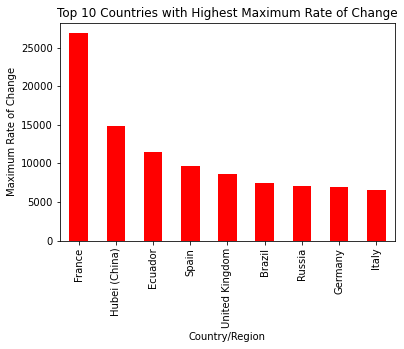

In [135]:
df_max_roc['Max Change'].sort_values(ascending=False)[0:9].plot(kind='bar',color='r')
plt.ylabel('Maximum Rate of Change')
plt.xlabel('Country/Region')
plt.title('Top 10 Countries with Highest Maximum Rate of Change')
plt.show()

In [241]:
X_unscaled2= df_max_roc.drop('Max Change', axis=1)
y2=df_max_roc['Max Change']

In [242]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X2 = min_max_scaler.fit_transform(X_unscaled2)

In [243]:
from sklearn.model_selection import train_test_split
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split( X2, y2, test_size=0.15, random_state=11)

In [244]:
print('X_train shape: ', X_train2.shape)
print('X_test shape: ', X_test2.shape)
print('y_train shape: ', y_train2.shape)
print('y_test shape: ', y_test2.shape)

X_train shape:  (179, 6)
X_test shape:  (32, 6)
y_train shape:  (179,)
y_test shape:  (32,)


## Linear Model

In [250]:
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2,y_train2)

LinearRegression()

In [251]:
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [  850.65922083  -458.01261187   637.98784788  2703.56955021
 -2440.1757761   6244.01087617]
Intercept:  -189.0053655317697


In [252]:
Weights_df2=pd.DataFrame()
Weights_df2.insert(0,'Features',X_unscaled2.columns.values)
Weights_df2.insert(1,'Weights',regr2.coef_)
Weights_df2=Weights_df2.append(pd.DataFrame([['Bias', regr2.intercept_]], columns=list(Weights_df2.columns.values)))
Weights_df2.set_index('Features',inplace=True)
Weights_df2

,Weights
Features,
Happiness Score,850.659221
GDP per capita,-458.012612
Social support,637.987848
Healthy life expectancy,2703.569550
Freedom to make life choices,-2440.175776
Population 2019,6244.010876
Bias,-189.005366


In [253]:
var2=[]
for i in range(Weights_df2.shape[0]-1):
    var2.append('X%d'%(i+1))
var2.append('1')
print(var2)

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', '1']


In [254]:
Weights_df2.insert(0,'Variable',var2)
Weights_df2

,Variable,Weights
Features,,
Happiness Score,X1,850.659221
GDP per capita,X2,-458.012612
Social support,X3,637.987848
Healthy life expectancy,X4,2703.569550
Freedom to make life choices,X5,-2440.175776
Population 2019,X6,6244.010876
Bias,1,-189.005366


## Evaluation

In [256]:
y_pred2 = regr2.predict(X_test2)

In [257]:
#MAE
report.loc[1,'MAE']=round(np.mean(np.absolute(y_pred2 - y_test2)),2)
#MSE
report.loc[1,'MSE']=round(np.mean((y_pred2 - y_test2)** 2),2)
#R2
report.loc[1,'R^2']=round(r2_score(y_pred2 , y_test2),2)

In [260]:
report.set_index('Model',inplace=True)
report

,MAE,MSE,R^2
Model,,,
NPC,248.72,237506,-3.16
MIC,677.12,653644,-0.62


In [224]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" %np.mean(np.absolute(y_pred2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred2 - y_test2)** 2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_test2) )

Mean absolute error: 677.12
Residual sum of squares (MSE): 653644.31
R2-score: -0.62


In [262]:
df_max_roc.columns

Index(['Happiness Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Population 2019', 'Max Change'],
      dtype='object')

(0.0, 28244.042856168868)

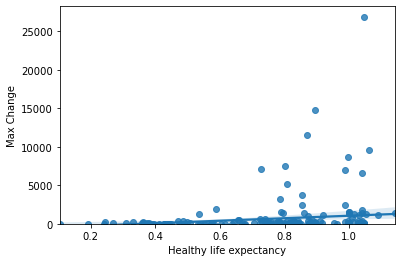

In [265]:
sns.regplot(x='Healthy life expectancy', y='Max Change', data=df_max_roc) 
plt.ylim(0,)

### Degree 2

In [225]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model', LinearRegression())]

pipe2=Pipeline(Input)
pipe2.fit(X_train2,y_train2)

yhat2=pipe2.predict(X_test2)

In [226]:
print("Mean absolute error: %.2f" %np.mean(np.absolute(y_pred2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred2 - y_test2)** 2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_test2) )

Mean absolute error: 916.94
Residual sum of squares (MSE): 3230934.07
R2-score: 0.08


### Degree 3

In [227]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=3)),('model', LinearRegression())]

pipe2=Pipeline(Input)
pipe2.fit(X_train2,y_train2)

yhat2=pipe2.predict(X_test2)

In [166]:
print("Mean absolute error: %.2f" %np.mean(np.absolute(y_pred2 - y_test2)))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred2 - y_test2)** 2))
print("R2-score: %.2f" % r2_score(y_pred2 , y_test2) )

Mean absolute error: 7508.53
Residual sum of squares (MSE): 371964615.64
R2-score: -0.04
